<a href="https://colab.research.google.com/github/NicoMolinaD/computer-vision/blob/main/document_scanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Corner detection

Fernando Quintero, M. Eng (c)

Universidad Tecnológica de Bolívar

In this activity we will go through corner detection for a document scanner

In [10]:
# Nicolás Molina Díaz - T00064715

import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils

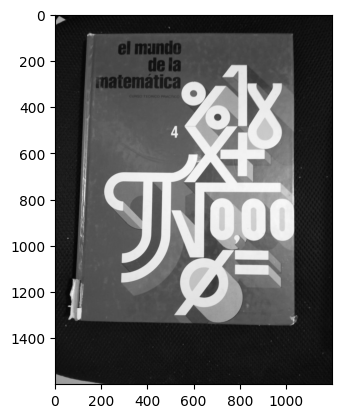

In [11]:
img = cv2.imread('./Image.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = 'gray')
plt.show()

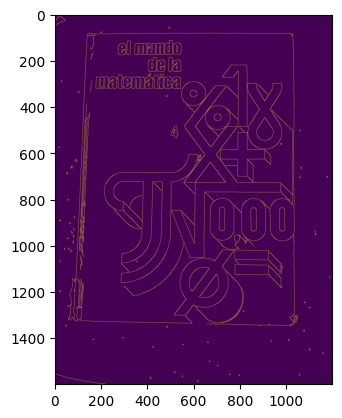

In [12]:
detail = cv2.detailEnhance(img,sigma_s = 20, sigma_r = 0.15)
gray = cv2.cvtColor(detail,cv2.COLOR_BGR2GRAY) # GRAYSCALE IMAGE
blur = cv2.GaussianBlur(gray,(5,5),0)

# edge detect
edge_image = cv2.Canny(blur,75,200)
plt.imshow(edge_image)

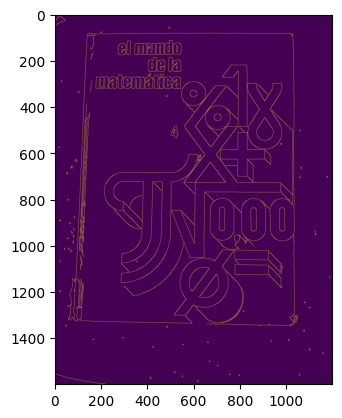

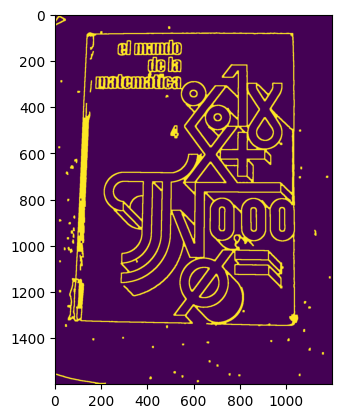

In [13]:
detail = cv2.detailEnhance(img,sigma_s = 20, sigma_r = 0.15)
gray = cv2.cvtColor(detail,cv2.COLOR_BGR2GRAY) # GRAYSCALE IMAGE
blur = cv2.GaussianBlur(gray,(5,5),0)

# edge detect
edge_image = cv2.Canny(blur,75,200)

# morphological transform
kernel = np.ones((5,5),np.uint8)
dilate = cv2.dilate(edge_image,kernel,iterations=1)
closing = cv2.morphologyEx(dilate,cv2.MORPH_CLOSE,kernel)

plt.imshow(edge_image)
plt.show()

plt.imshow(closing)
plt.show()

In [14]:
# find the contours
contours , hire = cv2.findContours(closing, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

contours = sorted(contours, key=cv2.contourArea, reverse=True)
for contour in contours:
    perimeter = cv2.arcLength(contour,True)
    corners = cv2.approxPolyDP(contour,0.02*perimeter, True)

    if len(corners) == 4:
        four_points = np.squeeze(corners)
        break

cv2.drawContours(img,[four_points],-1,(0,255,0),3)

array([[[  8,   9,   7],
        [  8,   9,   7],
        [  8,   8,   8],
        ...,
        [ 17,  11,  16],
        [ 18,  12,  17],
        [ 18,  12,  17]],

       [[  7,   8,   6],
        [  7,   8,   6],
        [  7,   7,   7],
        ...,
        [ 17,  11,  16],
        [ 18,  12,  17],
        [ 18,  12,  17]],

       [[  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6],
        ...,
        [ 17,  11,  16],
        [ 17,  11,  16],
        [ 18,  12,  17]],

       ...,

       [[147, 153, 158],
        [147, 153, 158],
        [147, 153, 158],
        ...,
        [ 23,  18,  19],
        [ 24,  18,  19],
        [ 24,  18,  19]],

       [[147, 153, 158],
        [147, 153, 158],
        [147, 153, 158],
        ...,
        [ 24,  18,  19],
        [ 25,  19,  20],
        [ 25,  19,  20]],

       [[147, 153, 158],
        [147, 153, 158],
        [147, 153, 158],
        ...,
        [ 24,  18,  19],
        [ 25,  19,  20],
        [ 25,  19,  20]]

In [15]:
four_points

array([[ 145,   80],
       [  55, 1323],
       [1030, 1345],
       [1027,   82]], dtype=int32)

In [16]:
four_points[:,0]

array([ 145,   55, 1030, 1027], dtype=int32)

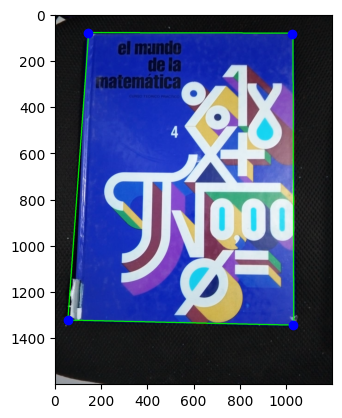

In [17]:
plt.imshow(img)
plt.plot(four_points[:,0],four_points[:,1], 'bo')
plt.show()